In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import time
from sklearn import datasets
from matplotlib.colors import ListedColormap
iris = datasets.load_iris() 

Zadanie 0. (2 punkty)
Zaimplementuj algorytm K-Means. Postaraj się, żeby implementacja była efektywna, bo będzie on
w przyszłości używany do przetwarzania dużych zbiorów danych. Sprawdź działanie
zaimplementowanego algorytmu na danych IRIS. 


czas:  0.0016171932220458984
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


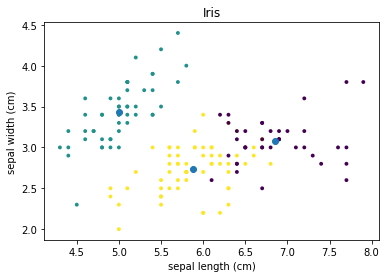

In [40]:
def dist(X, Y):
  return -2* np.dot(X, Y.T) + np.sum(Y ** 2, axis=1)

def mean(X):
  return np.sum(X, axis=0) / np.size(X, axis=0)

def kMeans(scope, K):
  change = True
  axis0 = np.size(scope, 0)
  axis1 = np.size(scope, 1)
  target = np.zeros(axis0)
  centroids = np.zeros((K, axis1))
  for i in range(K):
    centroids[i] = scope[random.randint(0, axis0-1)] 
  while change:       
    change = False
    groups = np.argmin(dist(scope, centroids), axis=1)
    if np.array_equal(groups, target):
      continue
    change = True  
    target = groups
    for k in range(K):
      centroids[k] = mean(scope[target==k])
  return centroids, target

czas = time.time()
centra, targets = kMeans(iris.data, 3)
print('czas: ', time.time() - czas)
print(targets)
X = iris.data[:, 0]
Y = iris.data[:, 1]

plt.title('Iris')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
kolory = ListedColormap(['red', 'blue', 'yellow'])
plt.scatter(X, Y, c=targets, marker='o', linewidth=0, s=15)
plt.scatter(centra[:, 0], centra[:, 1])
plt.show()
